In [81]:
import pandas as pd
df = pd.read_csv("./ds_salaries.csv")
display(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [82]:
df_features = df.copy(deep=True)
df_features_copy = df_features.copy(deep=True)

target = df_features["salary_in_usd"]
df_features.drop(["salary", "salary_in_usd"], axis=1, inplace=True)


display(df_features)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,US,100,US,L


# explore

In [83]:
from nltk.tokenize import word_tokenize

def define_job_type(job_title):
    if "Head" in job_title:
        return "Head"
    if "Director" in job_title:
        return "Director"
    if "Manager" in job_title:
        return "Manager"
    tokens = word_tokenize(job_title)
    return tokens[-1] 
def define_job_domain(job_title):
    tokens = word_tokenize(job_title)
    if "Data" in job_title or "Analytics" in job_title:
        return "Data"
    if "Machine Learning" in job_title or "ML" in job_title or "AI" in job_title or "Deep Learning":
        return "ML"
    return job_title


df_features["job_type"] = df["job_title"].apply(define_job_type) 
df_features["job_domain"] = df["job_title"].apply(define_job_domain) 

# use dython

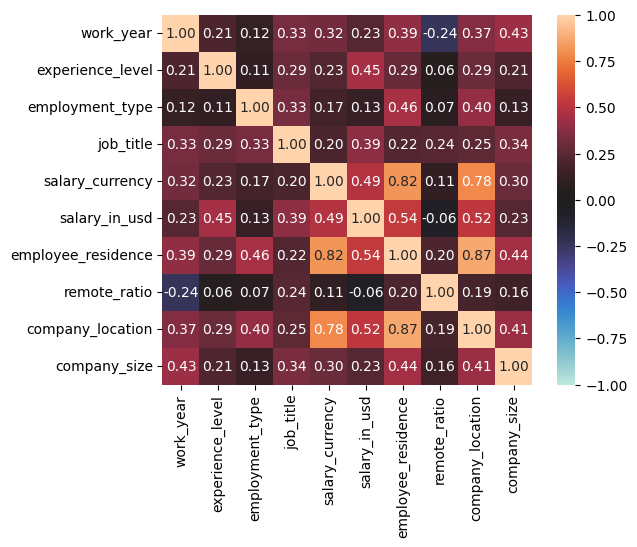

{'corr':                     work_year  experience_level  employment_type  job_title   
 work_year            1.000000          0.209309         0.118124   0.331799  \
 experience_level     0.209309          1.000000         0.107711   0.292217   
 employment_type      0.118124          0.107711         1.000000   0.330883   
 job_title            0.331799          0.292217         0.330883   1.000000   
 salary_currency      0.319718          0.225759         0.166962   0.195341   
 salary_in_usd        0.228290          0.446216         0.128071   0.386610   
 employee_residence   0.394466          0.288147         0.458637   0.224952   
 remote_ratio        -0.236430          0.057527         0.071486   0.236140   
 company_location     0.366383          0.289689         0.399428   0.251978   
 company_size         0.427798          0.211266         0.127183   0.342566   
 
                     salary_currency  salary_in_usd  employee_residence   
 work_year                  0.31971

In [84]:
from dython.nominal import associations
df.drop("salary", axis=1, inplace=True)
associations(df)

# calculate correlations

In [85]:
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
display(df_features)
cramers_v(df_features["salary_currency"], df_features["employee_residence"])


,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,job_type,job_domain
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L,Scientist,Data
1,2023,MI,CT,ML Engineer,USD,US,100,US,S,Engineer,ML
2,2023,MI,CT,ML Engineer,USD,US,100,US,S,Engineer,ML
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M,Scientist,Data
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M,Scientist,Data
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,US,100,US,L,Scientist,Data
3751,2021,MI,FT,Principal Data Scientist,USD,US,100,US,L,Scientist,Data
3752,2020,EN,FT,Data Scientist,USD,US,100,US,S,Scientist,Data
3753,2020,EN,CT,Business Data Analyst,USD,US,100,US,L,Analyst,Data


0.8186323316740632

# Create preprocessor

In [86]:

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pycountry_convert as pc

def get_continent(country):
    country_continent_code = pc.country_alpha2_to_continent_code(country)
    return country_continent_code


df_features["job"] = df_features["job_domain"] + df_features["job_type"]
df_features["residence"] = df_features["employee_residence"].apply(get_continent)

oneHot_features = ["work_year", "job", "residence", "salary_currency", "experience_level", "company_size"]
# ordinal_features = ["company_size"]
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), oneHot_features),
    # ("ord", OrdinalEncoder(categories=[["S", "L", "M"]]), ordinal_features)
    ])

oneHot_features_copy = ["work_year", 'salary_currency', 'employee_residence', "company_location", "employment_type", "remote_ratio", "job_title", "company_size", "experience_level"]
preprocessor_copy = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), oneHot_features_copy),
    ])

df_preprocessed = preprocessor.fit_transform(df_features)

df_preprocessed_copy = preprocessor_copy.fit_transform(df_features_copy)

df_preprocessed_features = pd.DataFrame(data=df_preprocessed.toarray(), columns=preprocessor.get_feature_names_out())
df_preprocessed_features_copy = pd.DataFrame(data=df_preprocessed_copy.toarray(), columns=preprocessor_copy.get_feature_names_out())
print(len(df_preprocessed_features_copy.columns))
print(len(df_preprocessed_features.columns))
# display(df_preprocessed[df_preprocessed["label__company_location"] == df_preprocessed["label__employee_residence"]])
# display(df_preprocessed[df_preprocessed["label__company_location"] != df_preprocessed["label__employee_residence"]])

281
58


In [ ]:
from sklearn.model_selection import train_test_split

target_stratified = pd.cut(target, bins=6, labels=False)

print(target_stratified)

0       1
1       0
2       0
3       2
4       1
       ..
3750    5
3751    1
3752    1
3753    1
3754    1
Name: salary_in_usd, Length: 3755, dtype: int64


In [ ]:
# Split into 80/20 Training / Testing
X_train, X_holdout, target_train, target_holdout = train_test_split(df_preprocessed, target, test_size=0.2, random_state=42)

X_train_stratified, X_holdout_stratified, target_train_stratified, target_holdout_stratified = train_test_split(df_preprocessed, target, test_size=0.2, stratify=target_stratified, random_state=42)

In [88]:
from scipy.sparse import save_npz

save_npz('./ds_salaries_Combined_Preprocessing_train.npz', X_train)
save_npz('./ds_salaries_Combined_Preprocessing_train_stratified.npz', X_train_stratified)

target_train.to_csv('./ds_salaries_target_train.csv', index=False)
target_train_stratified.to_csv('./ds_salaries_target_train_stratified.csv', index=False)

save_npz('./ds_salaries_Combined_Preprocessing_test.npz', X_holdout)
save_npz('./ds_salaries_Combined_Preprocessing_test_stratified.npz', X_holdout_stratified)

target_holdout.to_csv('./ds_salaries_target_test.csv', index=False)
target_holdout_stratified.to_csv('./ds_salaries_target_test_stratified.csv', index=False)

display(target_train.describe())
display(target_holdout.describe())


count      3004.000000
mean     138055.989348
std       63102.221140
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      176250.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

count       751.000000
mean     135627.992011
std       62873.313538
min        5409.000000
25%       95000.000000
50%      130000.000000
75%      170275.000000
max      385000.000000
Name: salary_in_usd, dtype: float64